In [ ]:
#Importing Libraries
import statistics
import numpy as np
import fathon
import pandas as pd
import seaborn as sns
from fathon import fathonUtils as fu
#time series

# importing networkx  
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

In [ ]:
df_dat=pd.read_excel('CommodityC.xlsx',sheet_name="Data")
df=df_dat[['.BCOM', '.BCOMEN', '.BCOMIN', '.BCOMAG', '.BCOMCO', '.BCOMCL', '.BCOMNG', '.BCOMRB', '.BCOMGC', '.BCOMPL', '.BCOMPA', '.BCOMAL', '.BCOMSI', '.BCOMHG', '.BCOMZS', '.BCOMPB', '.BCOMNI', '.BCOMWH', '.BCOMCN', '.BCOMSY', '.BCOMKC', '.BCOMSB', '.BCOMCC', '.BCOMCT']]

In [ ]:
G = nx.Graph() 
for i in df.columns:
    G.add_node(i)
  
count=0
rho_corr=[]
rho_corr_temp=[]
for i in df.columns:
    rho_corr_temp=[]
    for j in df.columns:
        if i!=j:
            a=df[i]
            b=df[j]
            #zero-mean cumulative sum
            a = fu.toAggregated(a)
            b = fu.toAggregated(b)
            #initialize non-empty dcca object
            pydcca = fathon.DCCA(a, b)
            #compute rho index
            n, rho = pydcca.computeRho(fu.linRangeByStep(20, 21, step=1))
            rho_corr_temp.append(rho[0])
            count=count+1
            if rho[0]>0.67:
                print(rho[0])
                G.add_edge(i,j)
        if i==j:
            rho_corr_temp.append(1)
    rho_corr.append(rho_corr_temp)

In [ ]:
plt.figure(figsize=(18,18))

x_labels = ['.BCOM', '.BCOMEN', '.BCOMIN', '.BCOMAG', '.BCOMCO', '.BCOMCL', '.BCOMNG', '.BCOMRB', '.BCOMGC', '.BCOMPL', '.BCOMPA', '.BCOMAL', '.BCOMSI', '.BCOMHG', '.BCOMZS', '.BCOMPB', '.BCOMNI', '.BCOMWH', '.BCOMCN', '.BCOMSY', '.BCOMKC', '.BCOMSB', '.BCOMCC', '.BCOMCT']

y_labels = ['.BCOM', '.BCOMEN', '.BCOMIN', '.BCOMAG', '.BCOMCO', '.BCOMCL', '.BCOMNG', '.BCOMRB', '.BCOMGC', '.BCOMPL', '.BCOMPA', '.BCOMAL', '.BCOMSI', '.BCOMHG', '.BCOMZS', '.BCOMPB', '.BCOMNI', '.BCOMWH', '.BCOMCN', '.BCOMSY', '.BCOMKC', '.BCOMSB', '.BCOMCC', '.BCOMCT']

ax=sns.heatmap(rho_corr,annot=True,cmap=sns.color_palette("cubehelix", as_cmap=True),xticklabels=x_labels, yticklabels=y_labels)

for text in ax.texts:
    if float(text.get_text()) < 0.0:
        text.set_color('crimson')
        text.set_weight('bold')
        #text.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='red'))
        #text.set_style('italic')
        #text(bbox=dict(facecolor='red', alpha=0.5))   
plt.show()

0.781974472265817
0.7428875391874211
0.7006055501113381
0.7551891650568606
0.781974472265817
0.9025233217682274
0.9329331558959333
0.9060677182506359
0.7778389212611828
0.9263753319734935
0.7428875391874211
0.8232930014913933
0.8311437399316929
0.9025233217682274
0.9579502978583989
0.8930614388105448
0.7006055501113381
0.9329331558959333
0.9579502978583989
0.9220752610848046
0.7551891650568606
0.9060677182506359
0.8930614388105448
0.9220752610848046
0.7778389212611828
0.9263753319734935
0.8232930014913933
0.8311437399316929


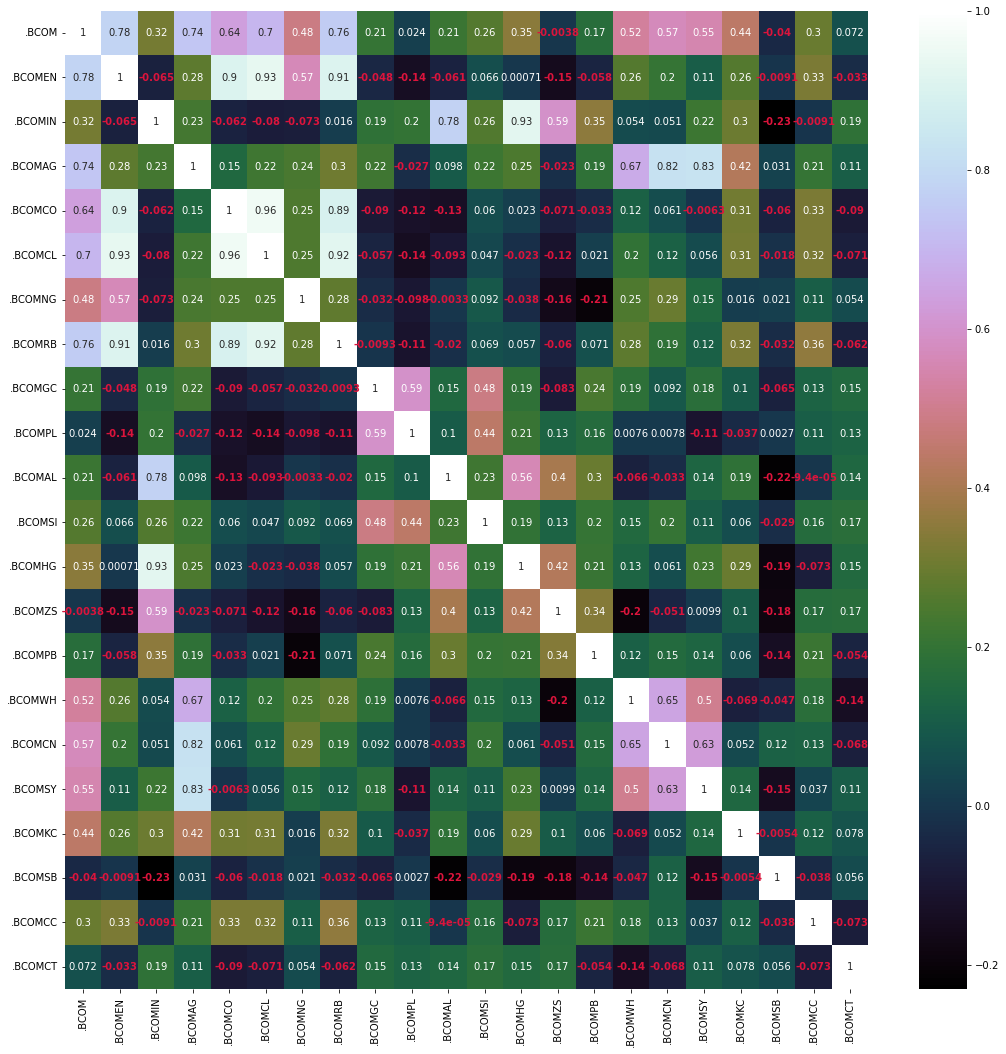

In [41]:
# Importing Libraries
import statistics
import numpy as np
import fathon
import pandas as pd
import seaborn as sns
from fathon import fathonUtils as fu
# time series

# importing networkx  
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

df_dat = pd.read_excel('CommodityC.xlsx', sheet_name="DataP")
# Assuming the 'Date' column is in datetime format
df_dat['Date'] = pd.to_datetime(df_dat['Date'], format='%d-%m-%Y')

# Function to filter DataFrame based on start and end date
def filter_dataframe_by_date(df, start_date, end_date):
    return df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Update the DataFrame based on start and end date
start_date_input = '1995-07-02'  # Replace with the desired start date in 'YYYY-MM-DD' format
end_date_input = '1997-07-02'    # Replace with the desired end date in 'YYYY-MM-DD' format
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
df_filtered = filter_dataframe_by_date(df_dat, start_date, end_date)

# Select columns for correlation calculation (excluding 'Date')
df = df_filtered.drop(columns=['Date'])

G = nx.Graph() 
for i in df.columns:
    G.add_node(i)

# COVID 03-01-2020	05-05-2023
# 2008 01-12-2007	01-06-2009
# Ebola 01-10-2013	01-01-2016
# Euro Dec-09	Oct-10
# Asian 02-07-1997	Dec-99

count = 0
rho_corr = []
rho_corr_temp = []
for i in df.columns:
    rho_corr_temp = []
    for j in df.columns:
        if i != j:
            a = df[i]
            b = df[j]
            # zero-mean cumulative sum
            a = fu.toAggregated(a)
            b = fu.toAggregated(b)
            # initialize non-empty dcca object
            pydcca = fathon.DCCA(a, b)
            # compute rho index
            n, rho = pydcca.computeRho(fu.linRangeByStep(20, 21, step=1))
            rho_corr_temp.append(rho[0])
            count = count + 1
            if rho[0] > 0.67:
                print(rho[0])
                G.add_edge(i, j)
        if i == j:
            rho_corr_temp.append(1)
    rho_corr.append(rho_corr_temp)

plt.figure(figsize=(18, 18))

x_labels = df.columns
y_labels = df.columns

ax = sns.heatmap(rho_corr, annot=True, cmap=sns.color_palette("cubehelix", as_cmap=True), xticklabels=x_labels, yticklabels=y_labels)

for text in ax.texts:
    if float(text.get_text()) < 0.0:
        text.set_color('crimson')
        text.set_weight('bold')

plt.show()


In [42]:
# Calculating Average correlations within a sector
Energy = 0
for i in range(4):
    for j in range(4):
        Energy = Energy + rho_corr[4+i][4+j]
Energy = (Energy-4)/12
print(Energy)

Metal = 0
for i in range(7):
    for j in range(7):
        Metal = Metal + rho_corr[8+i][8+j]
Metal = (Metal-7)/42
print(Metal)

Agri = 0
for i in range(7):
    for j in range(7):
        Agri = Agri + rho_corr[15+i][15+j]
Agri = (Agri-7)/42
print(Agri)

# Calculating Average correlations across different sectors
EnergyMetal = 0
for i in range(4):
    for j in range(7):
        EnergyMetal = EnergyMetal + rho_corr[4+i][8+j]
EnergyMetal = (EnergyMetal)/28
print(EnergyMetal)

MetalAgri = 0
for i in range(7):
    for j in range(7):
        MetalAgri = MetalAgri + rho_corr[8+i][15+j]
MetalAgri = (MetalAgri)/49
print(MetalAgri)

AgriEnergy = 0
for i in range(4):
    for j in range(7):
        AgriEnergy = AgriEnergy + rho_corr[4+i][15+j]
AgriEnergy = (AgriEnergy)/28
print(AgriEnergy)

0.5930920066774757
0.2663252063364411
0.10565385457657586
-0.0423387524324907
0.06045025801497918
0.13054513294781409
